# WATER QUALITY ANALYSIS
## Phase 4- Development Part 2

### Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the dataset

In [2]:
data=pd.read_csv("water_potability.csv")

## Data Preprocessing

### Displaying the data

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


### Data Cleaning - Handling Missing Values in Python using Pandas

In [5]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [6]:
# Remove rows with missing values
data_cleaned = data.fillna(0,inplace=True)

In [7]:
#checking for null values again
missing_values = data.isnull().sum()
print(missing_values)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


### Drop duplicates

In [8]:
#Drop duplicates
# Count the number of rows before removing duplicates
before_duplicates = data.shape[0]

# Remove duplicates
data.drop_duplicates(inplace=True)

# Count the number of rows after removing duplicates
after_duplicates = data.shape[0]

# Check if duplicates were removed
if before_duplicates > after_duplicates:
    print(f"Duplicates have been removed. Rows before: {before_duplicates}, Rows after: {after_duplicates}")
else:
    print("No duplicates were found in the dataset.")



No duplicates were found in the dataset.


### Handling Outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


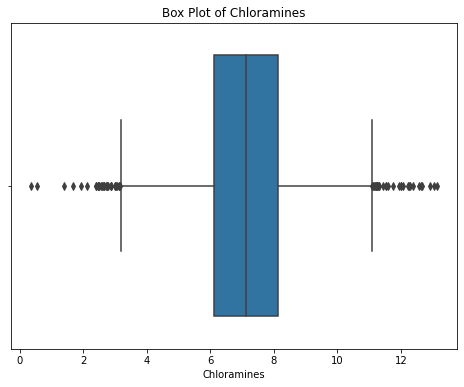

In [9]:
# Create a box plot for a specific feature (e.g., 'Chloramines')
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Chloramines'], orient="v")
plt.title('Box Plot of Chloramines')
plt.show()


In [10]:
## removing outliers
# Calculate Z-scores for each data point
z_scores = np.abs(stats.zscore(data))

# Set a threshold for Z-scores (e.g., 3) to identify outliers
threshold = 3

# Create a new DataFrame without outliers
df = data[(z_scores <= threshold).all(axis=1)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


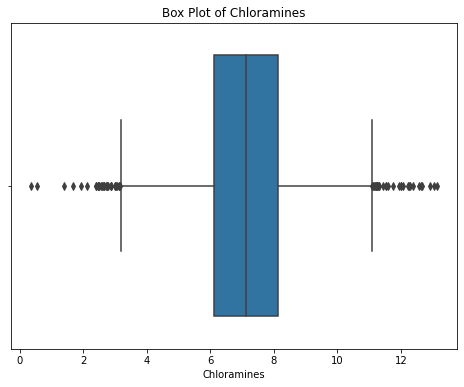

In [11]:
# Create a box plot for a specific feature (e.g., 'Chloramines')
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Chloramines'], orient="v")
plt.title('Box Plot of Chloramines')
plt.show()


In [12]:
# Check the shape (number of rows and columns) of the original and modified data
original_shape = data.shape
new_shape = df.shape

print("Original Data Shape:", original_shape)
print("Data without Outliers Shape:", new_shape)

# Print some summary statistics to see the effect of removing outliers
original_stats = data.describe()
new_stats = df.describe()

print("\nSummary Statistics of Original Data:")
print(original_stats)

print("\nSummary Statistics of Data without Outliers:")
print(new_stats)


Original Data Shape: (3276, 10)
Data without Outliers Shape: (3198, 10)

Summary Statistics of Original Data:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      6.019540   196.369496  22014.092526     7.122277   254.203468   
std       2.924207    32.879761   8768.570828     1.583085   146.765192   
min       0.000000    47.432000    320.942611     0.352000     0.000000   
25%       5.283146   176.850538  15666.690297     6.127421   240.722848   
50%       6.735249   196.967627  20927.833607     7.130299   318.660382   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        63.112960

## Exploratory Data Analysis

In [13]:
# Summary statistics
print(data.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      6.019540   196.369496  22014.092526     7.122277   254.203468   
std       2.924207    32.879761   8768.570828     1.583085   146.765192   
min       0.000000    47.432000    320.942611     0.352000     0.000000   
25%       5.283146   176.850538  15666.690297     6.127421   240.722848   
50%       6.735249   196.967627  20927.833607     7.130299   318.660382   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        63.112960     3.966786     0.390110  
std       80.824064        3.308162        21.353531     0.780382     0.487849  


In [14]:
# Data quality checks
missing_values = data.isnull().sum()
print(missing_values)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


In [15]:
unique_values = data.nunique()
print(unique_values)

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2496
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3115
Turbidity          3276
Potability            2
dtype: int64


In [16]:
data_types = data.dtypes
print(data_types)

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


In [17]:
# Correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)

                       ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.032591 -0.051277    -0.010452 -0.010128   
Hardness         0.032591  1.000000 -0.046899    -0.030054 -0.031065   
Solids          -0.051277 -0.046899  1.000000    -0.070148 -0.026671   
Chloramines     -0.010452 -0.030054 -0.070148     1.000000  0.002513   
Sulfate         -0.010128 -0.031065 -0.026671     0.002513  1.000000   
Conductivity     0.030879 -0.023915  0.013831    -0.020486 -0.017943   
Organic_carbon   0.034793  0.003610  0.010242    -0.012653  0.029329   
Trihalomethanes  0.013248 -0.005691 -0.023065     0.014974 -0.011642   
Turbidity       -0.009120 -0.014449  0.019546     0.002363  0.000244   
Potability       0.020390 -0.013837  0.033743     0.023779  0.011542   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.030879        0.034793         0.013248  -0.009120   
Hardness            -0.023915        0.003610        

## Visualization

### Correlation matrix

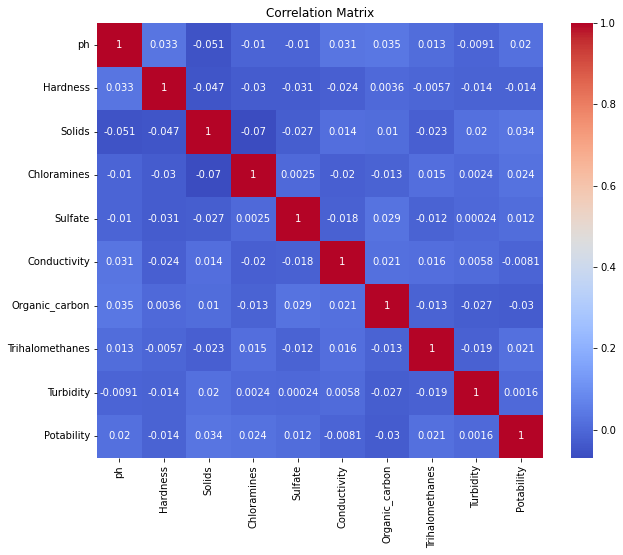

In [18]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Count Plot

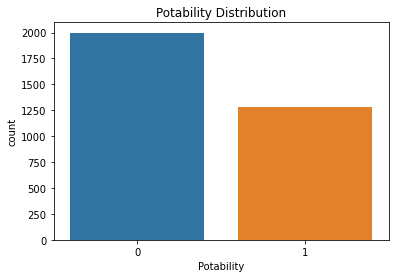

In [19]:
# Distribution of the 'Potability' variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=data)
plt.title('Potability Distribution')
plt.show()

### Pair Plot

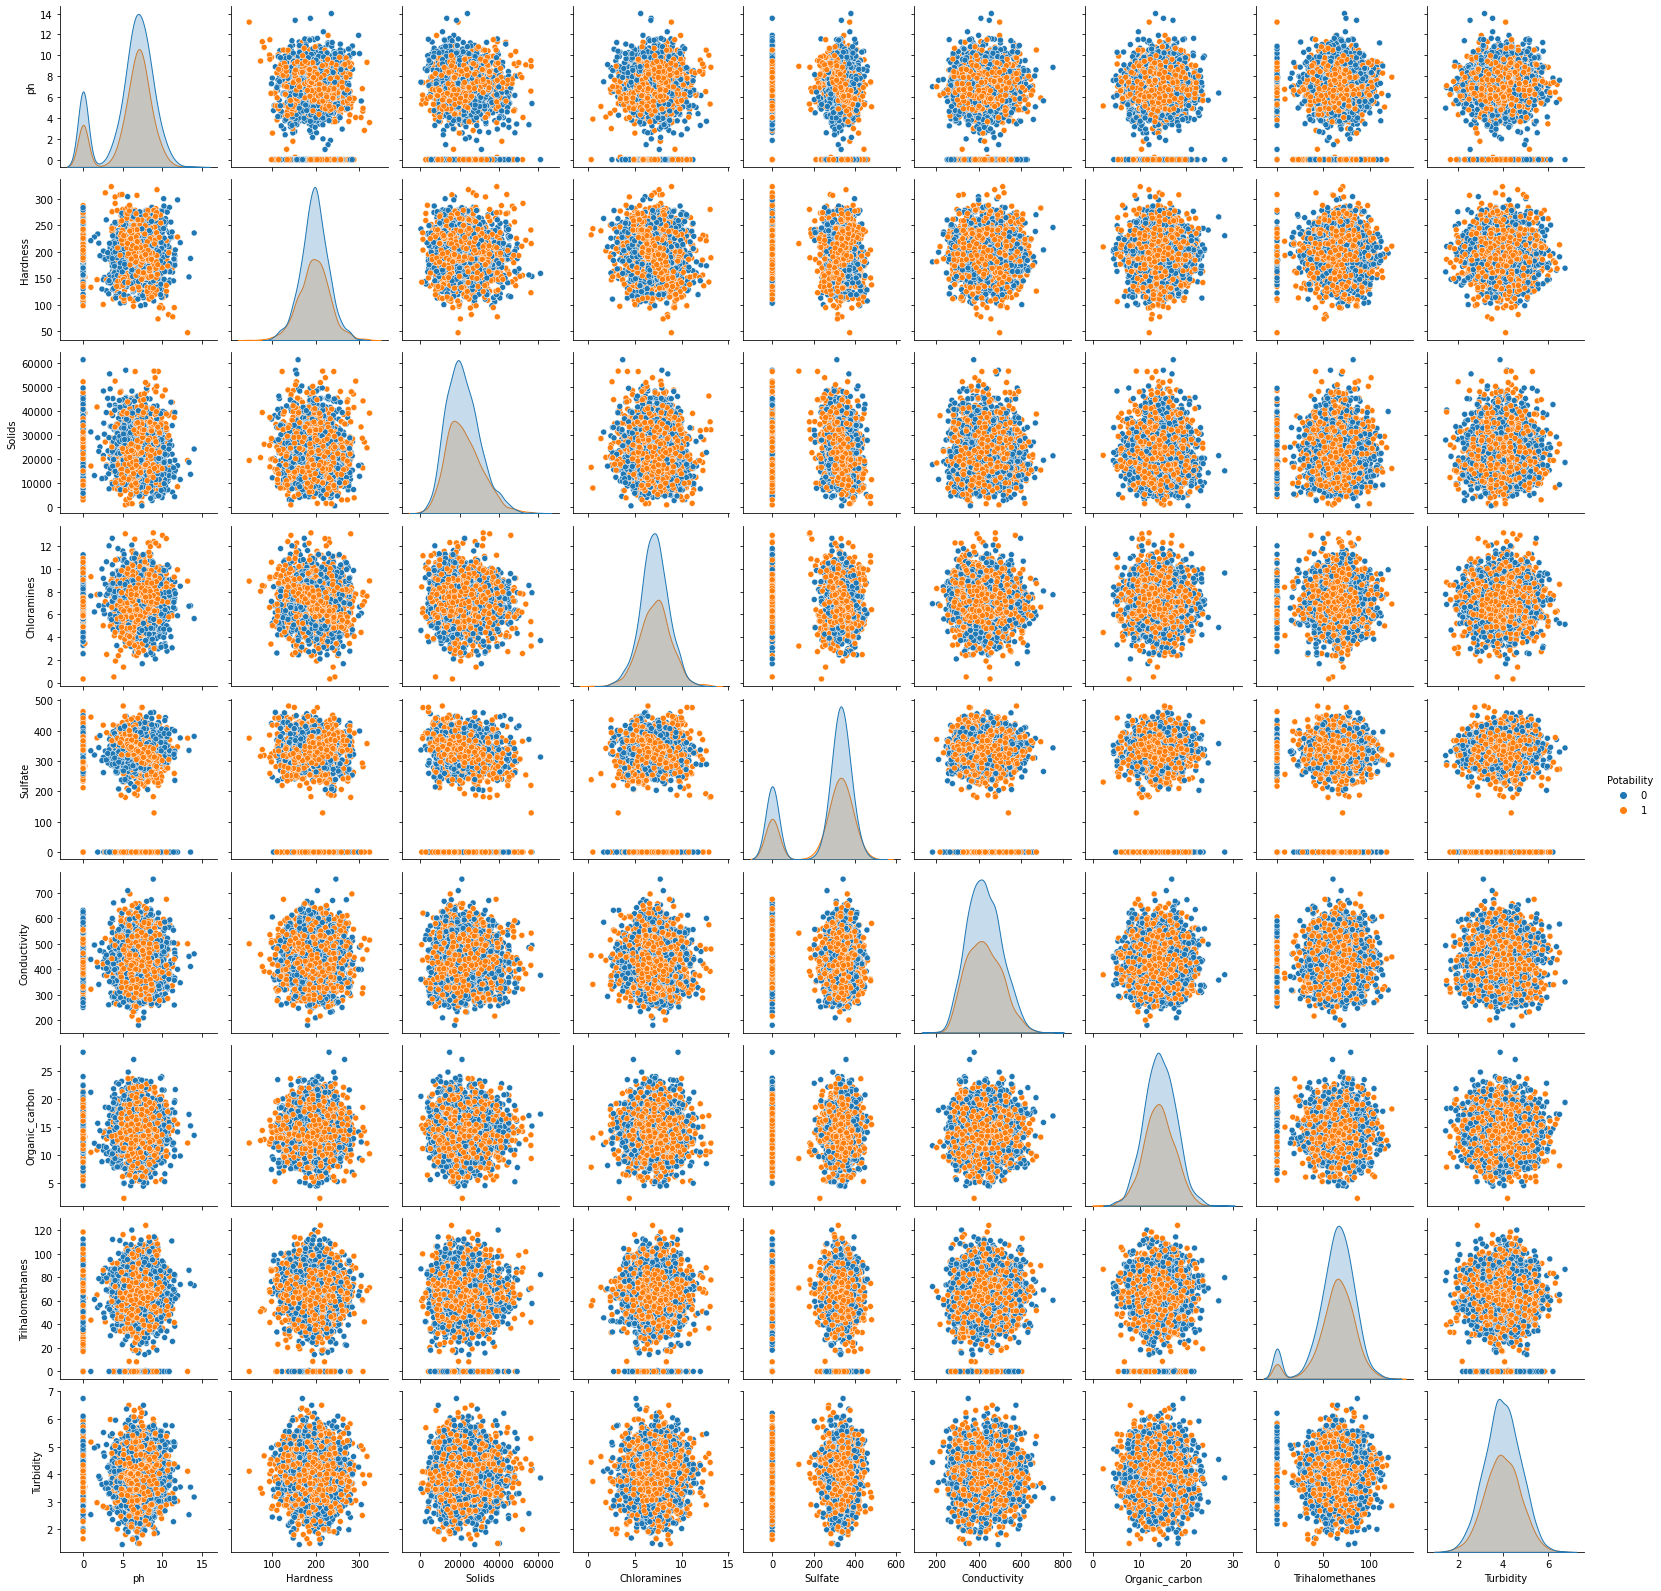

In [20]:
# Pairplot to visualize relationships between features
sns.pairplot(data, hue='Potability', diag_kind='kde')
plt.show()

### Box Plot

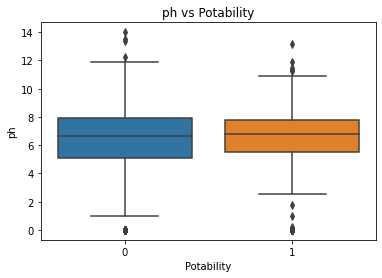

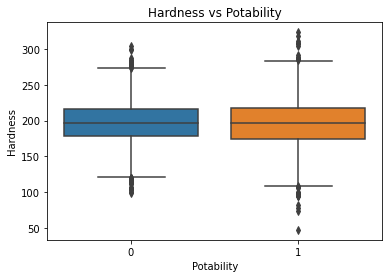

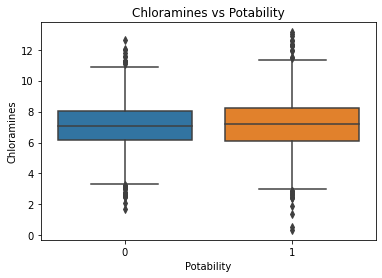

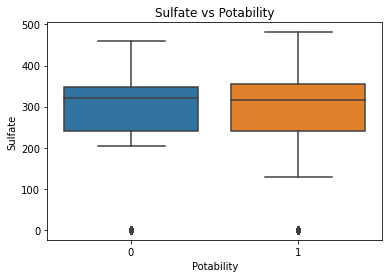

In [21]:
# Box plots for selected features
selected_features = ['ph', 'Hardness', 'Chloramines', 'Sulfate']
for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Potability', y=feature, data=data)
    plt.title(f'{feature} vs Potability')
    plt.show()

### Histogram

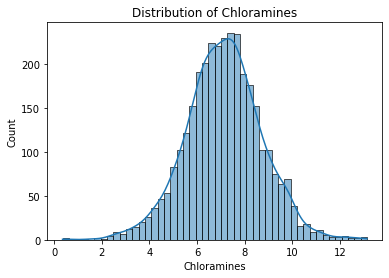

In [22]:
# Distribution of a specific parameter, e.g., 'Chloramines'
plt.figure(figsize=(6, 4))
sns.histplot(data['Chloramines'], kde=True)
plt.title('Distribution of Chloramines')
plt.show()



## Conclusion

Hence, the water quality analysis has been preprocessed, exploratory data analysis has been performed successfully. The missing values are handled and outliers are visualized. 

In [23]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Histogram

<Figure size 864x720 with 0 Axes>

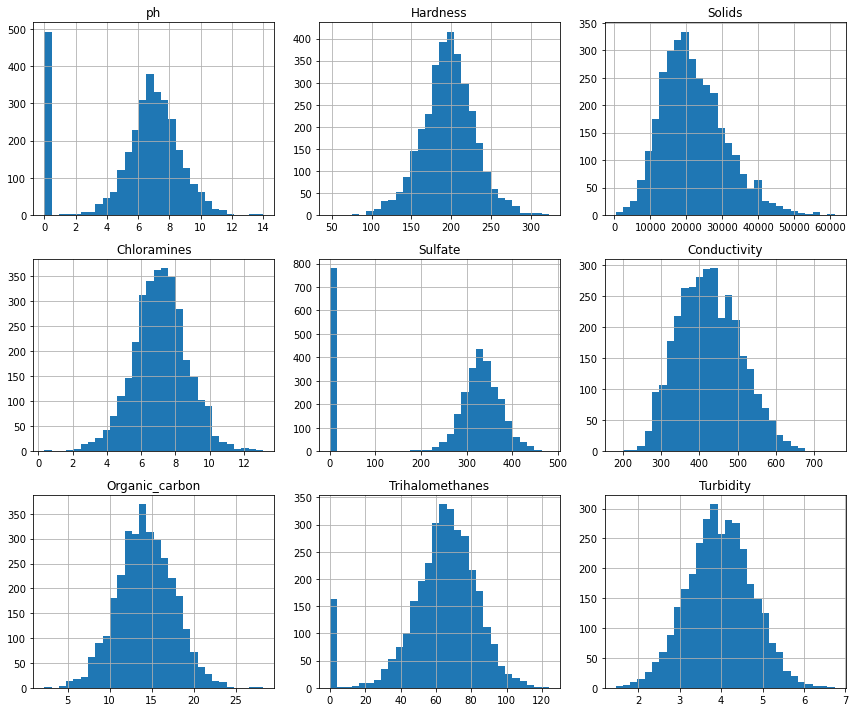

In [24]:
# Plot histograms for numerical features
plt.figure(figsize=(12, 10))
data.drop('Potability', axis=1).hist(bins=30, figsize=(12,10))
plt.tight_layout()
plt.show()

## Boxplot

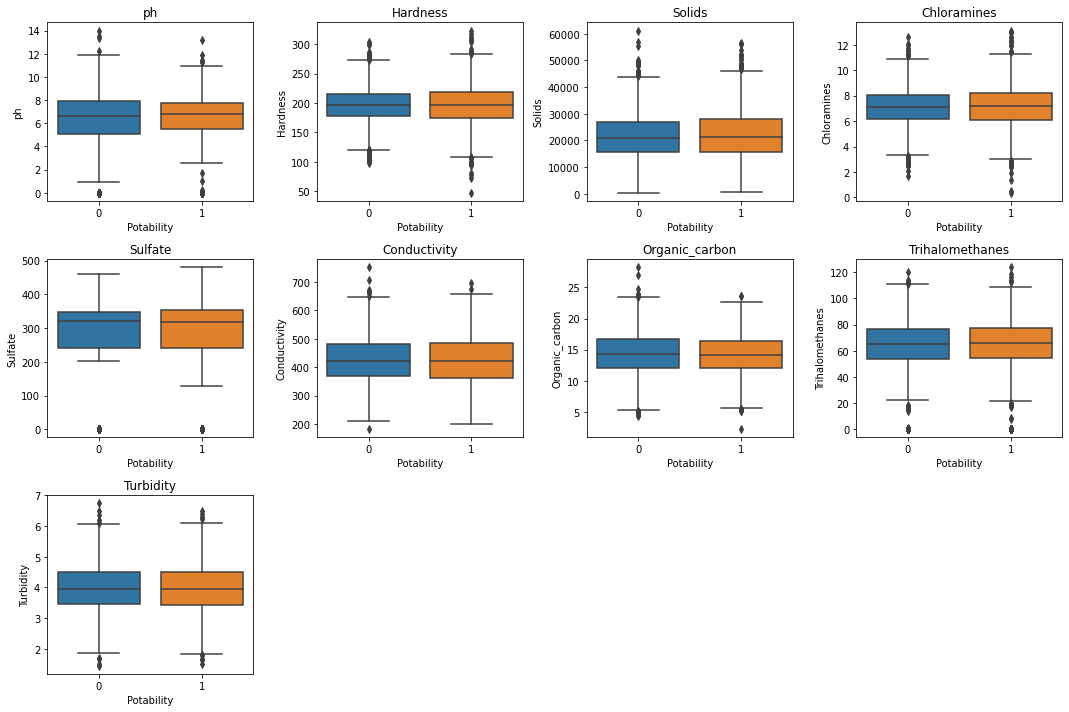

In [25]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(data.columns[:-1]):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=data, x='Potability', y=feature)
    plt.title(feature)

plt.tight_layout()
plt.show()

## Correlation matrix

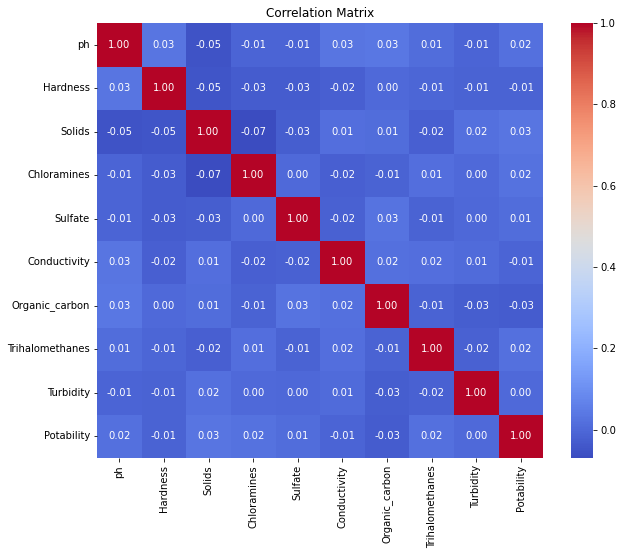

In [26]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Scatter plot

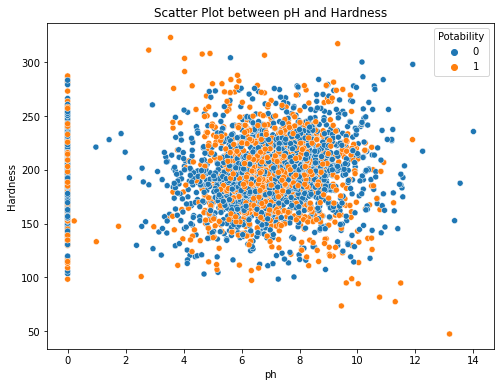

In [27]:
# Scatter plot for two features
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ph', y='Hardness', hue='Potability', data=data)
plt.title('Scatter Plot between pH and Hardness')
plt.show()

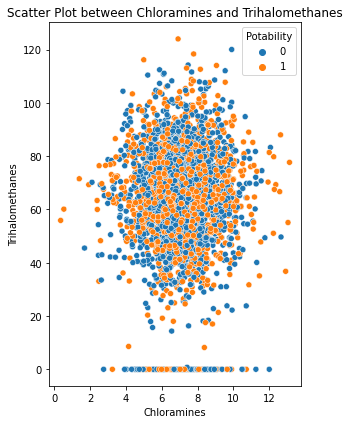

In [29]:

# Scatter plot 2: 'Chloramines' vs 'Trihalomethanes'
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 2)
sns.scatterplot(x='Chloramines', y='Trihalomethanes', hue='Potability', data=data)
plt.title('Scatter Plot between Chloramines and Trihalomethanes')

plt.tight_layout()
plt.show()

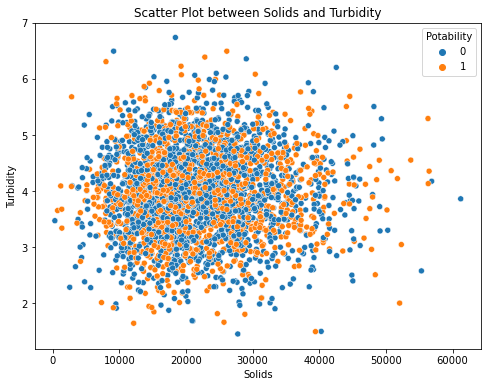

In [30]:
# Scatter plot for 'Solids' vs 'Turbidity' colored by 'Potability'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Solids', y='Turbidity', hue='Potability', data=data)
plt.title('Scatter Plot between Solids and Turbidity')
plt.show()

## Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
data.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

### Splitting the dataset into training and testing sets

In [33]:
x_train, x_test, y_train, y_test = train_test_split(data.Organic_carbon, data.Potability)

### Visualizing the training and testing datasets

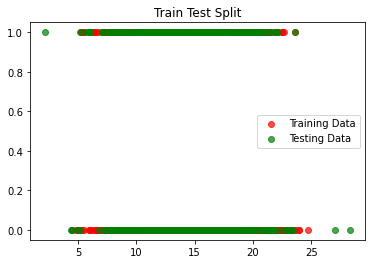

In [34]:
plt.scatter(x_train,y_train,label = 'Training Data',color ='r',alpha=.7)
plt.scatter(x_test,y_test,label='Testing Data',color='g',alpha=.7)
plt.legend()
plt.title('Train Test Split')
plt.show()

### Create linear model and train it

In [35]:
lr = LinearRegression()
lr.fit(x_train.values.reshape(-1,1),y_train.values)

LinearRegression()

### Use model to predict on test data

In [36]:
predict = lr.predict(x_test.values.reshape(-1,1))

### Plot predict line against actual test data


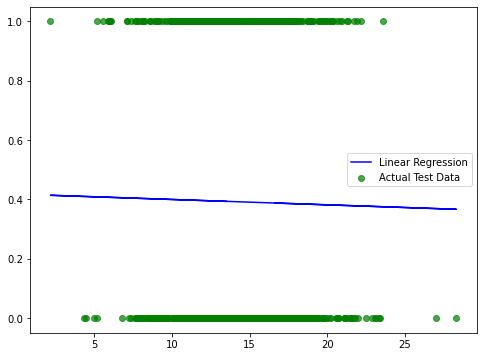

In [40]:
plt.figure(figsize=(8, 6))
plt.plot(x_test,predict,label='Linear Regression',color='b')
plt.scatter(x_test,y_test,label='Actual Test Data',color = 'g',alpha=0.7)
plt.legend()
plt.show()

### Score this model

In [41]:
lr.score(x_test.values.reshape(-1,1),y_test.values)

0.0016942393941762335

## Logistic Regression

In [49]:
features =['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes', 'Turbidity']
x = data[features]
y = data.Potability

### Spliting the dataset into training set and testing set

In [50]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20 , random_state = 0)

### Training the dataset (x_train,y_train) 

In [61]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter = 1000)
reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

### Predicting values of y_test using x_test

In [62]:
y_predict = reg.predict(x_test)
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

### Forming confusion matrix for actual and predicted y(Outcome) values

In [63]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_predict)
cnf_matrix

array([[410,   2],
       [244,   0]], dtype=int64)

### Plotting confusion matrix using heatmaps

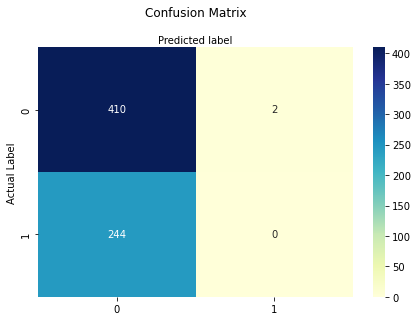

In [64]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks,class_names)

#create heatmaps
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap ="YlGnBu",fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix',y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted label');

### Performance metrics: 4 metrics are used to analyse the performance of dataset
##### These are accuracy,precision,recall and f1 score

In [65]:
print("Accuracy:",metrics.accuracy_score(y_test,y_predict))

Accuracy: 0.625


## Random Forest

In [66]:
X = data.drop(['Potability'], axis=1)
y = data['Potability']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((2194, 9), (1082, 9))

In [68]:
X_train.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
dtype: object

In [69]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes','Turbidity'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [70]:
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1556,1,1,1,1,1,1,1,1,1
1362,2,2,2,2,2,2,2,2,2
2787,3,3,3,3,3,3,3,3,3
1134,4,4,4,4,4,4,4,4,4
1509,5,5,5,5,2,5,5,5,5


In [71]:
X_test.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2947,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2782,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1644,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
70,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2045,-1.0,-1.0,-1.0,-1.0,2.0,-1.0,-1.0,-1.0,-1.0


In [72]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)
print(y_pred)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

[1 1 1 ... 1 1 1]
Model accuracy score with 10 decision-trees : 0.3715


In [73]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.3715


In [74]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [75]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

ph                 0.121366
Trihalomethanes    0.118925
Sulfate            0.112190
Solids             0.110021
Conductivity       0.109354
Organic_carbon     0.109070
Chloramines        0.108384
Turbidity          0.107367
Hardness           0.103322
dtype: float64

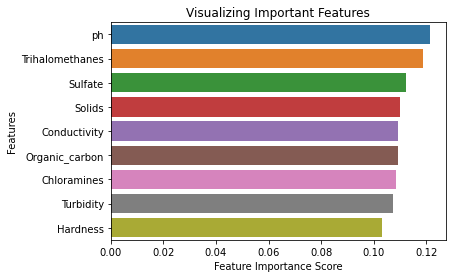

In [76]:
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

In [77]:
X = data.drop(['Potability', 'ph'], axis=1)
y = data['Potability']

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [79]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity','Organic_carbon', 'Trihalomethanes','Turbidity'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [80]:
clf = RandomForestClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(y_pred)
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

[1 1 1 ... 1 1 1]
Model accuracy score with doors variable removed : 0.3715


In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[  0 680]
 [  0 402]]


#### Conclusion:
Hence successfully visualised the dataset using histograms,pairplots and performed Linear regression, logistic regression and random forest classifier